In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('ola_driver_scaler.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [3]:
df.shape

(19104, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)

In [6]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [8]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
df.duplicated().value_counts()   #no duplicates in the data

False    19104
Name: count, dtype: int64

In [10]:
df['Driver_ID'].value_counts().unique()

array([24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [11]:
df.sort_values(by=['Driver_ID','MMM-YY'])

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [12]:
# convert MMM-YY into date_time format and DOJ, Last working day
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

C:\Users\jains\AppData\Local\Temp\ipykernel_14704\1628466476.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])


In [13]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

C:\Users\jains\AppData\Local\Temp\ipykernel_14704\3927372037.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])


In [14]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

C:\Users\jains\AppData\Local\Temp\ipykernel_14704\1702989152.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [16]:
df.isna().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [17]:
# KNN Imputation for missing values of Age

In [18]:
df['Gender'].value_counts()

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

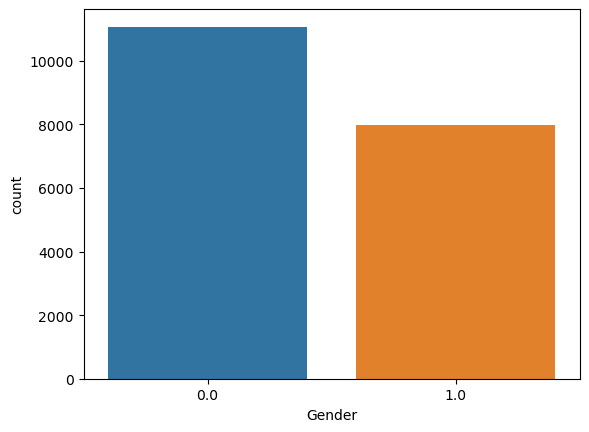

In [19]:
sns.countplot(x=df['Gender'])

In [20]:
df['Education_Level'].value_counts()

Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64

<Axes: xlabel='Education_Level', ylabel='count'>

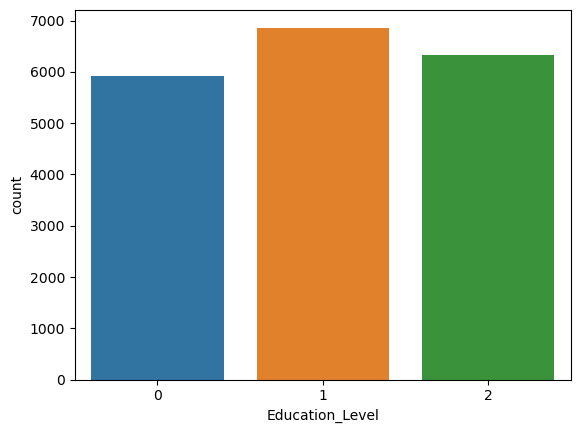

In [21]:
sns.countplot(x=df['Education_Level'])

In [22]:
df['Joining Designation'].value_counts()

Joining Designation
1    9831
2    5955
3    2847
4     341
5     130
Name: count, dtype: int64

In [23]:
df['Grade'].value_counts()

Grade
2    6627
1    5202
3    4826
4    2144
5     305
Name: count, dtype: int64

In [24]:
df['Quarterly Rating'].value_counts()

Quarterly Rating
1    7679
2    5553
3    3895
4    1977
Name: count, dtype: int64

In [25]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [26]:
params= {'n_neighbors': range(1,10)}

In [27]:
kimp = KNNImputer(weights='distance')

In [28]:
grid_search = GridSearchCV(kimp, param_grid=params,cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df[['Age','Gender']])

C:\Users\jains\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jains\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\jains\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jains\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() mis

GridSearchCV(cv=5, estimator=KNNImputer(weights='distance'),
             param_grid={'n_neighbors': range(1, 10)},
             scoring='neg_mean_squared_error')

In [29]:
grid_search.best_estimator_

KNNImputer(n_neighbors=1, weights='distance')

In [30]:
imputed_data= grid_search.best_estimator_.transform(df[['Age','Gender']])

In [31]:
imputed_df= pd.DataFrame(imputed_data, columns=['Age','Gender'])

In [32]:
df['Age']= imputed_df['Age']
df['Gender']= imputed_df['Gender']

In [33]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [34]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [35]:
agg_fns= {
    'Age': 'max',
    'Gender': 'first',
    'City':'first',
    'Education_Level':'last', 
    'Income':'last',
    'Joining Designation':'last',
    'Grade':'last',
    'Dateofjoining':'last',
    'LastWorkingDate':'last',
    'Total Business Value':'sum',
    'Quarterly Rating':'last'
}

In [36]:
new_data= df.groupby(['Driver_ID','MMM-YY']).aggregate(agg_fns)

In [37]:
new_data

Age  Gender City  Education_Level  Income  \
Driver_ID MMM-YY                                                   
1         2019-01-01  28.0     0.0  C23                2   57387   
          2019-02-01  28.0     0.0  C23                2   57387   
          2019-03-01  28.0     0.0  C23                2   57387   
2         2020-11-01  31.0     0.0   C7                2   67016   
          2020-12-01  31.0     0.0   C7                2   67016   
...                    ...     ...  ...              ...     ...   
2788      2020-08-01  30.0     0.0  C27                2   70254   
          2020-09-01  30.0     0.0  C27                2   70254   
          2020-10-01  30.0     0.0  C27                2   70254   
          2020-11-01  30.0     0.0  C27                2   70254   
          2020-12-01  30.0     0.0  C27                2   70254   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                    1      1    2018-12-24   
          2019-02-01                    1      1    2018-12-24   
          2019-03-01                    1      1    2018-12-24   
2         2020-11-01                    2      2    2020-11-06   
          2020-12-01                    2      2    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                    2      2    2020-06-08   
          2020-09-01                    2      2    2020-06-08   
          2020-10-01                    2      2    2020-06-08   
          2020-11-01                    2      2    2020-06-08   
          2020-12-01                    2      2    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT               2381060                 2  
          2019-02-01             NaT               -665480                 2  
          2019-03-01      2019-03-11                     0                 2  
2         2020-11-01             NaT                     0                 1  
          2020-12-01             NaT                     0                 1  
...                              ...                   ...               ...  
2788      2020-08-01             NaT                740280                 3  
          2020-09-01             NaT                448370                 3  
          2020-10-01             NaT                     0                 2  
          2020-11-01             NaT                200420                 2  
          2020-12-01             NaT                411480                 2  

[19104 rows x 11 columns]

In [38]:
df.sort_values(by=['Driver_ID','MMM-YY'])

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [39]:
grouped_df = df.groupby(['Driver_ID','MMM-YY'])['Quarterly Rating'].mean()

In [40]:
grouped_df

Driver_ID  MMM-YY    
1          2019-01-01    2.0
           2019-02-01    2.0
           2019-03-01    2.0
2          2020-11-01    1.0
           2020-12-01    1.0
                        ... 
2788       2020-08-01    3.0
           2020-09-01    3.0
           2020-10-01    2.0
           2020-11-01    2.0
           2020-12-01    2.0
Name: Quarterly Rating, Length: 19104, dtype: float64

In [41]:
df['previous qtr rating']= df.groupby(['Driver_ID'])['Quarterly Rating'].shift(1)

In [42]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0


In [43]:
df['previous qtr rating'] = df['previous qtr rating'].fillna(0)

In [44]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0.0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0.0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0


In [45]:
df['rating growth'] = (df['Quarterly Rating'] - df['previous qtr rating'])/df['previous qtr rating']

In [46]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0.0,inf
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0,0.000000
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0,0.000000
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0.0,inf
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0,0.000000
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0,0.000000
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0,-0.333333
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0,0.000000


In [47]:
df['rating growth'].replace([np.inf, -np.inf],0,inplace=True)

In [48]:
df.tail(20)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth
19084,2019-03-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,970380,2,2.0,0.000000
19085,2019-04-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,432240,2,2.0,0.000000
19086,2019-05-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,387660,2,2.0,0.000000
19087,2019-06-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,0,2,2.0,0.000000
19088,2019-07-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,318460,1,2.0,-0.500000
19089,2019-08-01,2786,45.0,0.0,C19,0,35370,2018-07-31,NaT,2,2,0,1,1.0,0.000000
19090,2019-09-01,2786,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,0,1,1.0,0.000000
19091,2019-01-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,408090,2,0.0,0.000000
19092,2019-02-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,250000,2,2.0,0.000000
19093,2019-03-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,319740,2,2.0,0.000000


In [49]:
driver_id = list(df[df['rating growth']>0]['Driver_ID'])

In [50]:
len(driver_id)   #DriverId for which atleast once quarter rating is positive


1245

In [51]:
# assigning values 1 for driver whose rating has increased
qri=[]
for i in df['Driver_ID']:
    if i in driver_id:
        qri.append(1)
    else:
        qri.append(0)
    

In [52]:
len(qri)

19104

In [53]:
qrf= df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})

In [54]:
qrl = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})

In [55]:
qr_Pos_driver = list(qrl[(qrl['Quarterly Rating']- qrf['Quarterly Rating'])>0].reset_index()['Driver_ID'])

In [56]:
len(qr_Pos_driver)

358

In [57]:
df['Driver_ID'].nunique()

2381

In [58]:
df['qr_pos']= df['Driver_ID'].isin(qr_Pos_driver).astype(int)

In [59]:
df
# Assigned values to driver whose quarter rating is postive


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth,qr_pos
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0.0,0.000000,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0,0.000000,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0,0.000000,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0.0,0.000000,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0,0.000000,1
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0,0.000000,1
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0,-0.333333,1
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0,0.000000,1


In [60]:
df['Attrited'] = np.where(df['LastWorkingDate'].notnull(),1,0)
    


In [61]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth,qr_pos,Attrited
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0.0,0.000000,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0,0.000000,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0,0.000000,0,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0.0,0.000000,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0,0.000000,1,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0,0.000000,1,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0,-0.333333,1,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0,0.000000,1,0


In [62]:
df[(df['qr_pos']==1 )& (df['Attrited']==1 ) ]  #employees who left even had positive ratings

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth,qr_pos,Attrited
281,2019-12-01,51,34.0,0.0,C14,0,131347,2017-05-22,2019-12-23,4,4,582010,2,2.0,0.0,1,1
604,2020-09-01,84,42.0,0.0,C16,0,25950,2019-07-04,2020-09-04,1,1,-300000,2,2.0,0.0,1,1
991,2020-06-01,145,35.0,0.0,C13,1,75112,2020-02-13,2020-06-22,3,3,0,3,3.0,0.0,1,1
1035,2019-06-01,152,31.0,0.0,C17,0,31547,2018-06-03,2019-06-15,1,2,0,2,2.0,0.0,1,1
1330,2020-12-01,196,44.0,0.0,C14,1,75001,2020-05-29,2020-12-26,3,3,0,2,2.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17760,2020-12-01,2596,33.0,0.0,C20,2,69003,2019-09-28,2020-12-21,3,3,0,2,2.0,0.0,1,1
17965,2019-11-01,2624,33.0,1.0,C12,1,87954,2015-07-30,2019-11-12,2,3,0,4,4.0,0.0,1,1
18305,2020-12-01,2675,29.0,0.0,C7,1,68500,2020-06-19,2020-12-06,2,2,0,3,3.0,0.0,1,1
18408,2019-06-01,2691,31.0,1.0,C16,0,21445,2018-06-26,2019-06-18,3,3,0,2,2.0,0.0,1,1


In [63]:
df.sort_values(by=['Driver_ID','MMM-YY'],inplace=True)

In [64]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,previous qtr rating,rating growth,qr_pos,Attrited
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0.0,0.000000,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0,0.000000,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2.0,0.000000,0,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0.0,0.000000,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,3.0,0.000000,1,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,3.0,0.000000,1,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0,-0.333333,1,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0,0.000000,1,0


In [65]:
def check_increased_rating(group):
    
    first_rev = group.iloc[0]
    last_rev = group.iloc[-1]
    growth = (last_rev- first_rev)*100/first_rev
    
    if growth>0:
        return 1
    else:
        return 0

In [66]:
df['rating growth'] = df.groupby('Driver_ID')['Quarterly Rating'].transform(check_increased_rating)


In [67]:
df.drop(columns=['qr_pos','previous qtr rating'], inplace=True)

In [68]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating growth,Attrited
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,1,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,1,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,1,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,1,0


In [69]:
# check wtherther income has increased since driver joined

In [70]:
def check_income_increase(group):
    first_sal =group.iloc[0]
    last_sal= group.iloc[-1]
    
    if last_sal> first_sal:
        return 1
    else:
        return 0

In [71]:
df['sal_growth'] = df.groupby('Driver_ID')['Income'].transform(check_income_increase)

In [72]:
df['sal_growth'].value_counts()

sal_growth
0    18128
1      976
Name: count, dtype: int64

In [73]:
df.shape

(19104, 16)

In [74]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'rating growth',
       'Attrited', 'sal_growth'],
      dtype='object')

In [75]:
df=df.groupby('Driver_ID').agg(
        {
            'Age':'last',
            'Gender':'last',
            'Education_Level':'last',
            'Income':'last',
            'Dateofjoining':'first',
            'Attrited':'last',
            'Joining Designation':'first',
            'Grade':'first',
            'Total Business Value':'sum',
            'rating growth':'last',
            'sal_growth': 'last',
            'City':'last'

        }

    )

df=df.reset_index()

In [76]:
df.shape

(2381, 13)

In [77]:
df

,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,Attrited,Joining Designation,Grade,Total Business Value,rating growth,sal_growth,City
0,1,28.0,0.0,2,57387,2018-12-24,1,1,1,1715580,0,0,C23
1,2,31.0,0.0,2,67016,2020-11-06,0,2,2,0,0,0,C7
2,4,43.0,0.0,2,65603,2019-12-07,1,2,2,350000,0,0,C13
3,5,29.0,0.0,0,46368,2019-01-09,1,1,1,120360,0,0,C9
4,6,31.0,1.0,1,78728,2020-07-31,0,3,3,1265000,1,0,C11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,0,82815,2015-10-15,0,2,3,21748820,1,0,C24
2377,2785,34.0,1.0,0,12105,2020-08-28,1,1,1,0,0,0,C9
2378,2786,45.0,0.0,0,35370,2018-07-31,1,2,2,2815090,0,0,C19
2379,2787,28.0,1.0,2,69498,2018-07-21,1,1,1,977830,0,0,C20


In [78]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,33.670727,21.0,29.0,33.0,37.0,58.0,5.973676
Gender,2381.0,0.411592,0.0,0.0,0.0,1.0,1.0,0.492225
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
Attrited,2381.0,0.678706,0.0,0.0,1.0,1.0,1.0,0.467071
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.078538,1.0,1.0,2.0,3.0,5.0,0.931321
Total Business Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446


In [79]:
# our target variable is Attrited

In [80]:
df

,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,Attrited,Joining Designation,Grade,Total Business Value,rating growth,sal_growth,City
0,1,28.0,0.0,2,57387,2018-12-24,1,1,1,1715580,0,0,C23
1,2,31.0,0.0,2,67016,2020-11-06,0,2,2,0,0,0,C7
2,4,43.0,0.0,2,65603,2019-12-07,1,2,2,350000,0,0,C13
3,5,29.0,0.0,0,46368,2019-01-09,1,1,1,120360,0,0,C9
4,6,31.0,1.0,1,78728,2020-07-31,0,3,3,1265000,1,0,C11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,0,82815,2015-10-15,0,2,3,21748820,1,0,C24
2377,2785,34.0,1.0,0,12105,2020-08-28,1,1,1,0,0,0,C9
2378,2786,45.0,0.0,0,35370,2018-07-31,1,2,2,2815090,0,0,C19
2379,2787,28.0,1.0,2,69498,2018-07-21,1,1,1,977830,0,0,C20


In [81]:
df['Education_Level'].value_counts()

Education_Level
2    802
1    795
0    784
Name: count, dtype: int64

In [82]:
df['Gender'].value_counts()

Gender
0.0    1401
1.0     980
Name: count, dtype: int64

In [83]:
df['City'].value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

In [84]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Dateofjoining', 'Attrited', 'Joining Designation', 'Grade',
       'Total Business Value', 'rating growth', 'sal_growth', 'City'],
      dtype='object')

### Categorical Features: Gender, City, Education, Joining_Designation,Last_Quarterly_Rating,Quarterly_Rating_Increased

In [85]:
# see count plot for categorical variables

In [86]:
cat_variables=['Gender','Education_Level','Attrited','Joining Designation','Grade','rating growth','sal_growth','City']

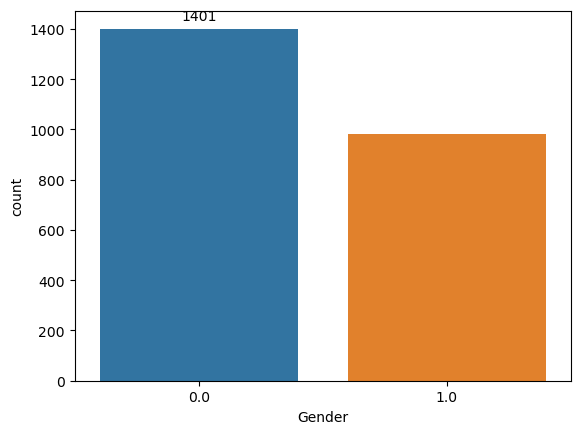

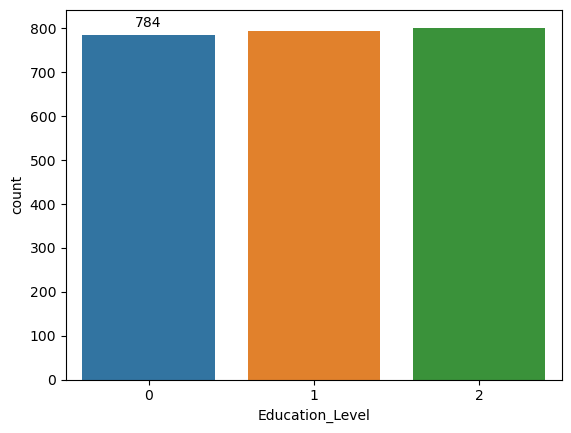

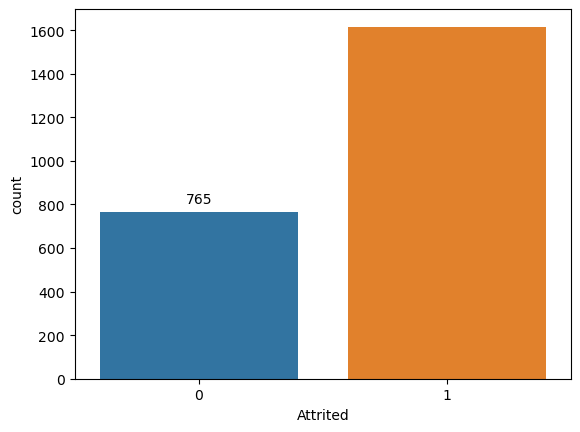

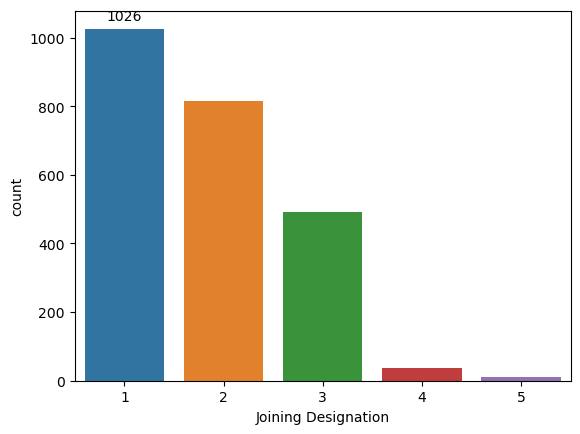

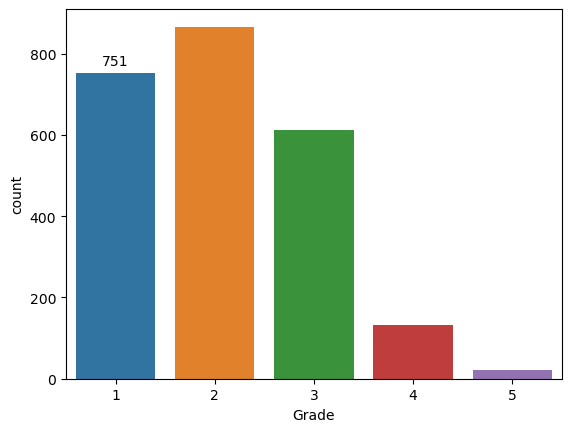

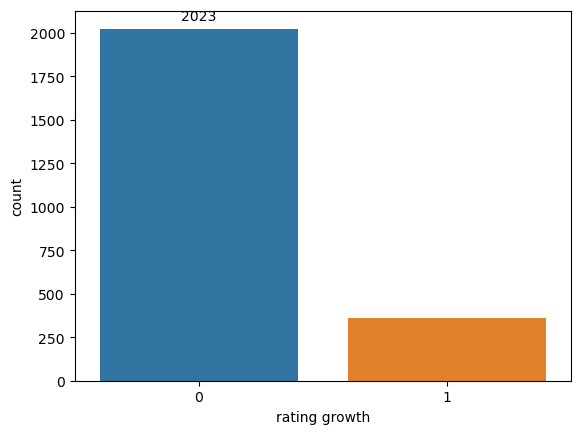

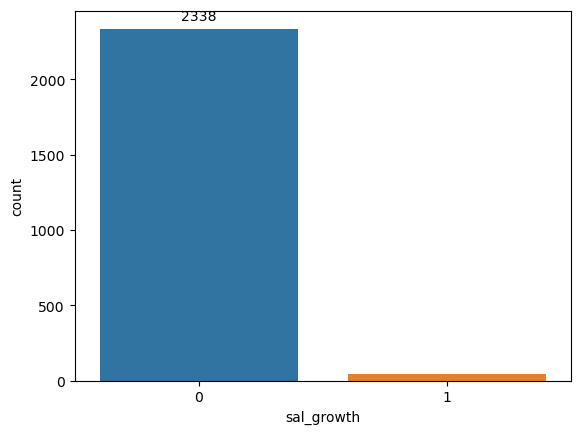

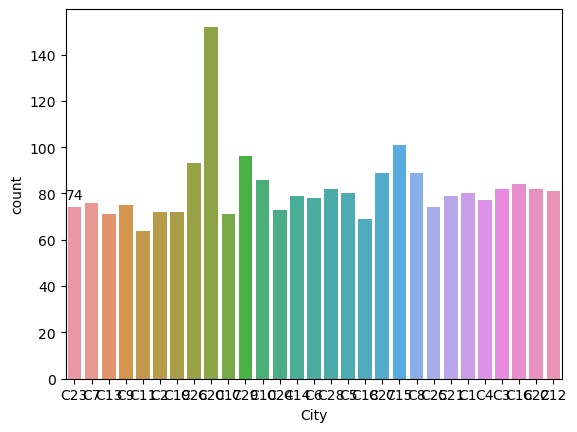

In [87]:
for var in cat_variables:
    ax=sns.countplot(data=df, x=var)
  
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
        plt.show()

In [88]:
# for continous vriables check distributions

In [89]:
cont_vars=['Age','Income','Total Business Value']

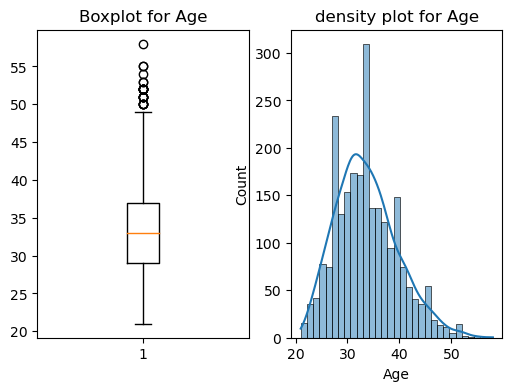

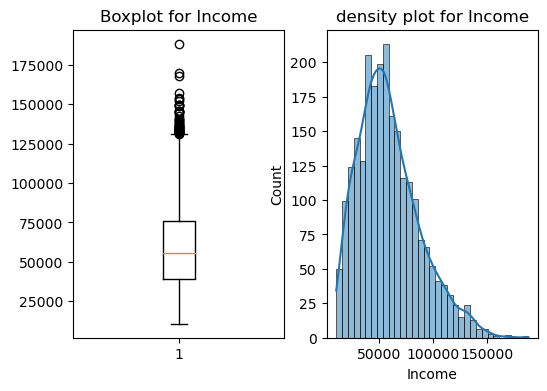

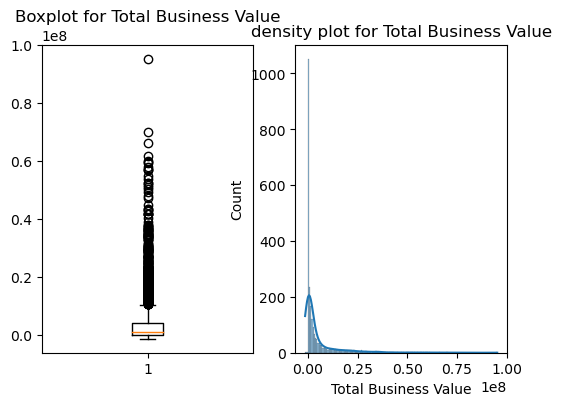

In [90]:
for var in cont_vars:
    
    plt.figure(figsize=(6,4))
    plt.subplot(121)
    plt.boxplot(data=df, x=var)
    plt.title(f'Boxplot for {var}')
    
    plt.subplot(122)
    sns.histplot(data=df, x=var,kde=True )
    plt.title(f'density plot for {var}')
    
    
    plt.show()

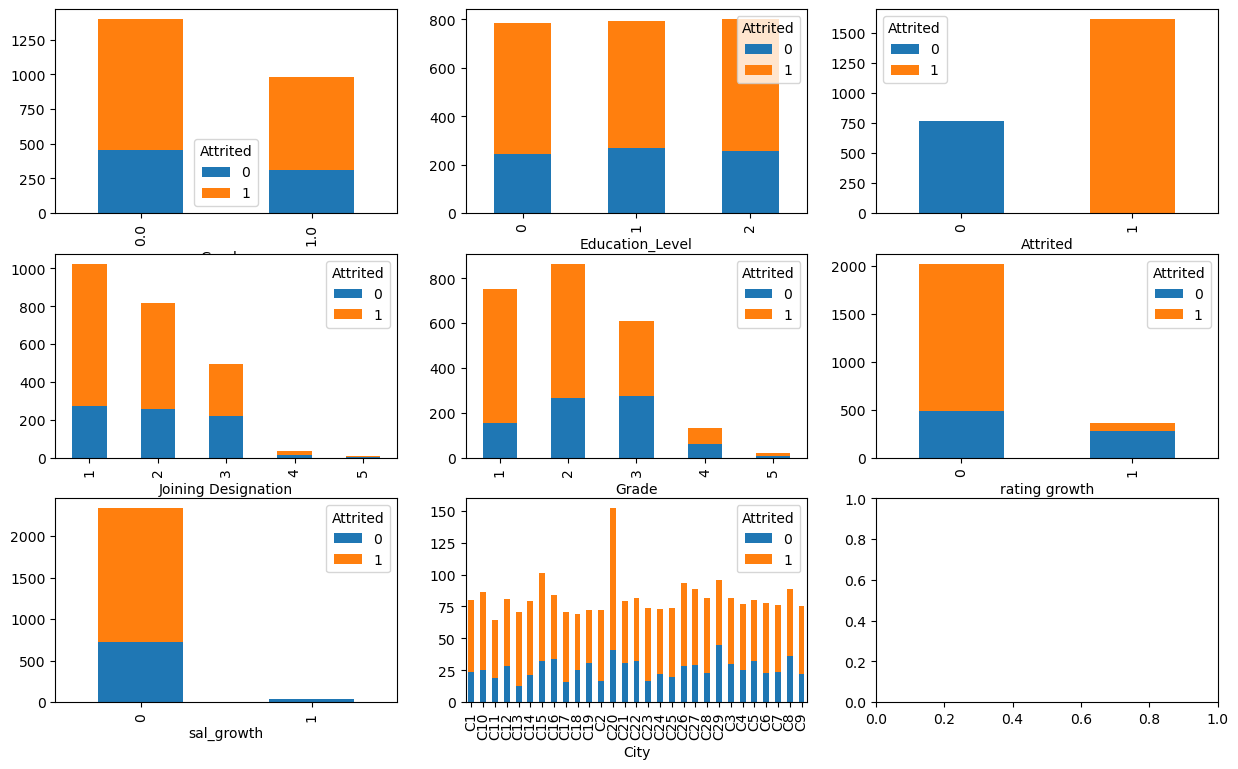

In [91]:
# Do Bi variate analysis wrt attrit variable which is our target variable
# its a categorical variable so we can try countplot with hue, clustered bar, stacked bar
fig, ax = plt.subplots(3,3,figsize=(15,9))
for i,ax in zip(cat_variables, ax.flatten()):
    cross_tab = pd.crosstab(df[i], df['Attrited'])
    cross_tab.plot(kind='bar',stacked=True,ax=ax)


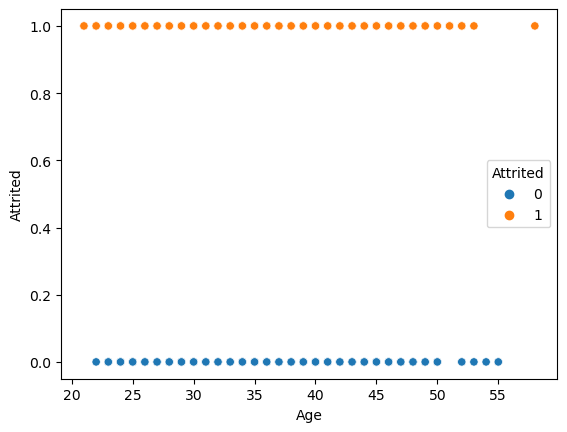

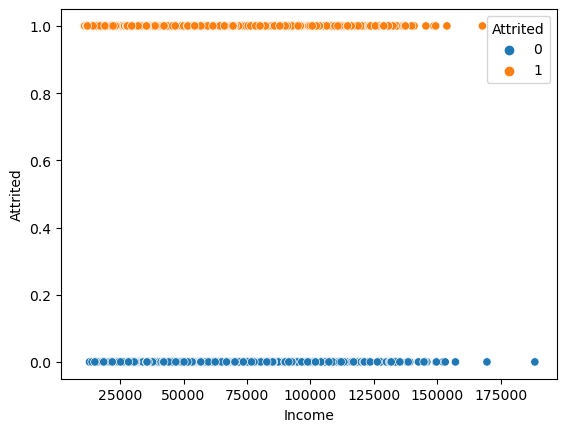

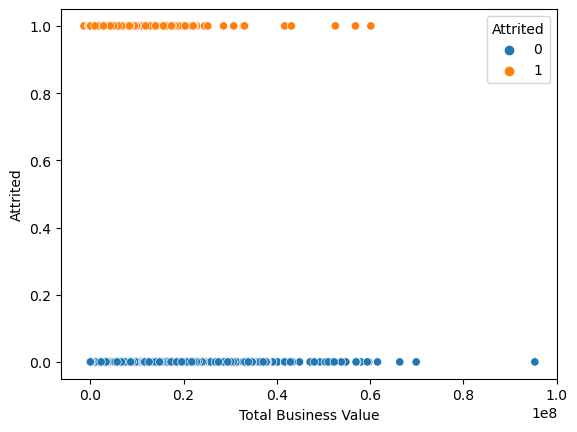

In [92]:
# Analyse continouse variable relation with target
for i in cont_vars:
    sns.scatterplot(x=df[i], y=df['Attrited'],hue=df['Attrited'])
    plt.show()


In [93]:
cont_vars

['Age', 'Income', 'Total Business Value']

In [94]:
num_bins = 10
df['Age_bins'] = pd.cut(df['Age'], bins=[15,28,35,45,60])
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [95]:
df['Attrited'].value_counts()

Attrited
1    1616
0     765
Name: count, dtype: int64

In [96]:
count_df = df.groupby('Age_bins')['Attrited'].value_counts().unstack()
count_df_perc= count_df.div(count_df.sum(axis=1), axis=0)
count_df_perc

Attrited,0,1
Age_bins,,
"(15, 28]",0.247917,0.752083
"(28, 35]",0.317801,0.682199
"(35, 45]",0.366120,0.633880
"(45, 60]",0.385417,0.614583


<Axes: xlabel='Age_bins'>

<Figure size 1000x600 with 0 Axes>

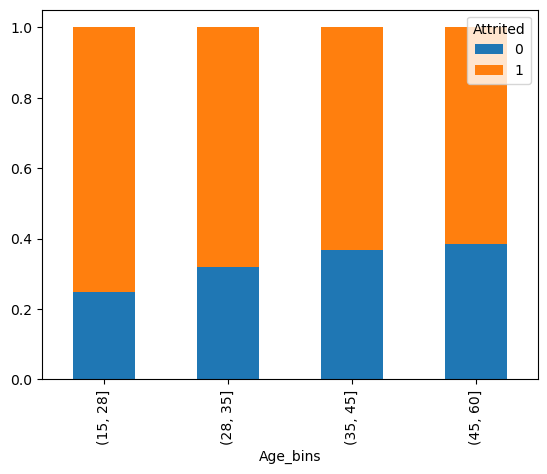

In [97]:
plt.figure(figsize=(10, 6))
count_df_perc.plot(kind='bar', stacked=True)

In [98]:
# maximim percentage of 15-28 are attrited

df['income_bins']= pd.cut(df['Income'], bins=[50000,75000,100000,150000,2500000])

In [99]:
df['income_bins'].value_counts()

income_bins
(50000, 75000]       776
(75000, 100000]      382
(100000, 150000]     224
(150000, 2500000]      7
Name: count, dtype: int64

In [100]:
df.groupby('income_bins')['Attrited'].value_counts().unstack()

Attrited,0,1
income_bins,,
"(50000, 75000]",260,516
"(75000, 100000]",171,211
"(100000, 150000]",102,122
"(150000, 2500000]",5,2


<Axes: xlabel='income_bins'>

<Figure size 1000x600 with 0 Axes>

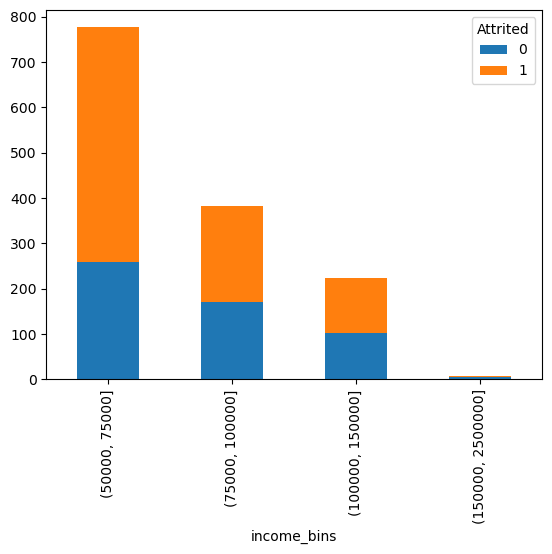

In [101]:
plt.figure(figsize=(10, 6))
df.groupby('income_bins')['Attrited'].value_counts().unstack().plot(kind='bar', stacked=True)

In [102]:
m1= round(df['Total Business Value'].min(),0)
m2= round(df['Total Business Value'].max(),0)
df['TB_Value_bins']= pd.cut(df['Total Business Value'], bins=[m1,80000,2000000,3200000,4400000,5600000,6800000,m2])

<Axes: xlabel='TB_Value_bins'>

<Figure size 1000x600 with 0 Axes>

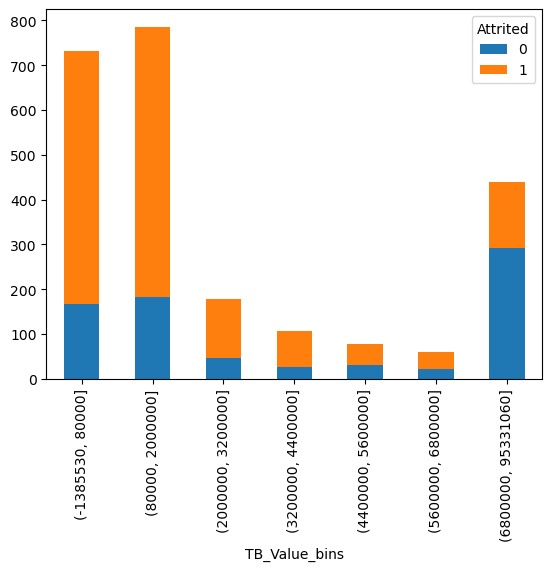

In [103]:
plt.figure(figsize=(10, 6))
df.groupby('TB_Value_bins')['Attrited'].value_counts().unstack().plot(kind='bar', stacked=True)

In [104]:
# higher TBV are maximum who are attrited

In [105]:
df.drop(columns= ['Age_bins','income_bins','TB_Value_bins'],inplace=True)

In [106]:
df

,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,Attrited,Joining Designation,Grade,Total Business Value,rating growth,sal_growth,City
0,1,28.0,0.0,2,57387,2018-12-24,1,1,1,1715580,0,0,C23
1,2,31.0,0.0,2,67016,2020-11-06,0,2,2,0,0,0,C7
2,4,43.0,0.0,2,65603,2019-12-07,1,2,2,350000,0,0,C13
3,5,29.0,0.0,0,46368,2019-01-09,1,1,1,120360,0,0,C9
4,6,31.0,1.0,1,78728,2020-07-31,0,3,3,1265000,1,0,C11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,0,82815,2015-10-15,0,2,3,21748820,1,0,C24
2377,2785,34.0,1.0,0,12105,2020-08-28,1,1,1,0,0,0,C9
2378,2786,45.0,0.0,0,35370,2018-07-31,1,2,2,2815090,0,0,C19
2379,2787,28.0,1.0,2,69498,2018-07-21,1,1,1,977830,0,0,C20


In [107]:
# Convert City into Categorical 
df['City'].nunique()   #we can do one hot encoding bu we will avoid here due to curse of dimensionality as no of records are lowor target encoding to convert city

29

In [108]:
df['City_encoded'] = df.groupby('City')['Attrited'].transform('mean')

In [109]:
df.drop(columns=['City','Dateofjoining','Driver_ID'], inplace = True)

In [110]:
# now we will apply ML models

In [111]:
y= df['Attrited']

In [112]:
X= df.drop(columns='Attrited')

In [113]:
print(X)

       Age  Gender  Education_Level  Income  Joining Designation  Grade  \
0     28.0     0.0                2   57387                    1      1   
1     31.0     0.0                2   67016                    2      2   
2     43.0     0.0                2   65603                    2      2   
3     29.0     0.0                0   46368                    1      1   
4     31.0     1.0                1   78728                    3      3   
...    ...     ...              ...     ...                  ...    ...   
2376  34.0     0.0                0   82815                    2      3   
2377  34.0     1.0                0   12105                    1      1   
2378  45.0     0.0                0   35370                    2      2   
2379  28.0     1.0                2   69498                    1      1   
2380  30.0     0.0                2   70254                    2      2   

      Total Business Value  rating growth  sal_growth  City_encoded  
0                  1715580   

In [114]:
print(y)

0       1
1       0
2       1
3       1
4       0
       ..
2376    0
2377    1
2378    1
2379    1
2380    0
Name: Attrited, Length: 2381, dtype: int32


In [115]:
# Scaling, train_test split
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_X=scaler.fit_transform(X)


In [116]:
X= pd.DataFrame(scaled_X, columns= X.columns)

In [117]:
X

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,rating growth,sal_growth,City_encoded
0,0.189189,0.0,1.0,0.262508,0.00,0.00,0.032064,0.0,0.0,0.836755
1,0.270270,0.0,1.0,0.316703,0.25,0.25,0.014326,0.0,0.0,0.535480
2,0.594595,0.0,1.0,0.308750,0.25,0.25,0.017944,0.0,0.0,1.000000
3,0.216216,0.0,0.0,0.200489,0.00,0.00,0.015570,0.0,0.0,0.614093
4,0.270270,1.0,0.5,0.382623,0.50,0.50,0.027405,1.0,0.0,0.601695
...,...,...,...,...,...,...,...,...,...,...
2376,0.351351,0.0,0.0,0.405626,0.25,0.50,0.239197,1.0,0.0,0.585959
2377,0.351351,1.0,0.0,0.007643,0.00,0.00,0.014326,0.0,0.0,0.614093
2378,0.648649,0.0,0.0,0.138588,0.25,0.25,0.043432,0.0,0.0,0.133710
2379,0.189189,1.0,1.0,0.330673,0.00,0.00,0.024436,0.0,0.0,0.696699


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32, test_size=0.2)

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
y.value_counts()

Attrited
1    1616
0     765
Name: count, dtype: int64

In [121]:
smote= SMOTE()
X_trn_bal, y_trn_bal= smote.fit_resample(X_train,y_train)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [123]:
params={
    'max_depth':[5,7,10,15,20],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[5,10,15]
}
Dt= DecisionTreeClassifier()
grid= GridSearchCV(Dt, cv=3, scoring='accuracy', param_grid= params)
grid.fit(X_trn_bal, y_trn_bal)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15]},
             scoring='accuracy')

In [124]:
grid.best_params_
#lets create tree based on these hyperparametrs, its also possible the tree have overfitted by selecting maximum depth
#for this we will see both train and test accuracy and variance for each cross validation


{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10}

In [125]:
best_dt_classifier = grid.best_estimator_

In [126]:
y_pred= best_dt_classifier.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       147
           1       0.87      0.76      0.81       330

    accuracy                           0.76       477
   macro avg       0.73      0.75      0.73       477
weighted avg       0.78      0.76      0.76       477



In [128]:
print(classification_report(y_trn_bal,best_dt_classifier.predict(X_trn_bal)))    

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1286
           1       0.85      0.81      0.83      1286

    accuracy                           0.84      2572
   macro avg       0.84      0.84      0.84      2572
weighted avg       0.84      0.84      0.84      2572



In [129]:
 # lets also see mean variance and mean_test_scores on the grid
grid_results= grid.cv_results_
mean_scores= grid_results['mean_test_score']
std_scores=grid_results['std_test_score']
variance= np.var(mean_scores)

In [130]:
print(f'Mean scores {mean_scores}')
print(f'Variance on test {variance}')

Mean scores [0.71113432 0.71191042 0.71112843 0.72085499 0.73601467 0.72629354
 0.72318871 0.74068392 0.73679167 0.73291437 0.7449606  0.74067939
 0.73291029 0.74146228 0.74029044 0.70530047 0.70452029 0.70801816
 0.72863089 0.72706692 0.73445613 0.72513258 0.72901395 0.72940109
 0.72202276 0.72862545 0.73678759 0.72280339 0.72590187 0.73678759]
Variance on test 0.00012529148079953872


In [131]:
# Lets try some ensemble techniques

<!-- code giving 75 percentage accuracy in testing and 85 in training. Lets try for some ensembles -->

In [132]:
# Lets try Random Forest first
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf= RandomForestClassifier()
params= {
    'n_estimators':[50,80,100,130,150],
    'max_depth':[3,5,8],
    'min_samples_leaf':[5,10,15]
    }

grid= GridSearchCV(rf, param_grid=params, cv= 3, scoring='f1' )
grid.fit(X_trn_bal,y_trn_bal)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 80, 100, 130, 150]},
             scoring='f1')

In [134]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}

In [135]:
rf= grid.best_estimator_

In [136]:
y_pred= rf.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       147
           1       0.87      0.83      0.85       330

    accuracy                           0.79       477
   macro avg       0.76      0.77      0.76       477
weighted avg       0.80      0.79      0.80       477



In [138]:
y_train_pred= rf.predict(X_trn_bal)

In [139]:
print(classification_report(y_train_pred, y_trn_bal))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1165
           1       0.87      0.80      0.83      1407

    accuracy                           0.82      2572
   macro avg       0.82      0.83      0.82      2572
weighted avg       0.83      0.82      0.82      2572



In [140]:
y_trn_proba= rf.predict_proba(X_trn_bal)

In [141]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [142]:
y_trn_bal.value_counts()

Attrited
1    1286
0    1286
Name: count, dtype: int64

In [143]:
y_trn_proba

array([[0.11909634, 0.88090366],
       [0.28188391, 0.71811609],
       [0.32508226, 0.67491774],
       ...,
       [0.6128749 , 0.3871251 ],
       [0.59547048, 0.40452952],
       [0.83694076, 0.16305924]])

In [144]:
fpr,tpr, thrhold = roc_curve( y_trn_bal, y_trn_proba[:,1])

In [145]:
auc_score = roc_auc_score(y_trn_bal, y_trn_proba[:, 1])

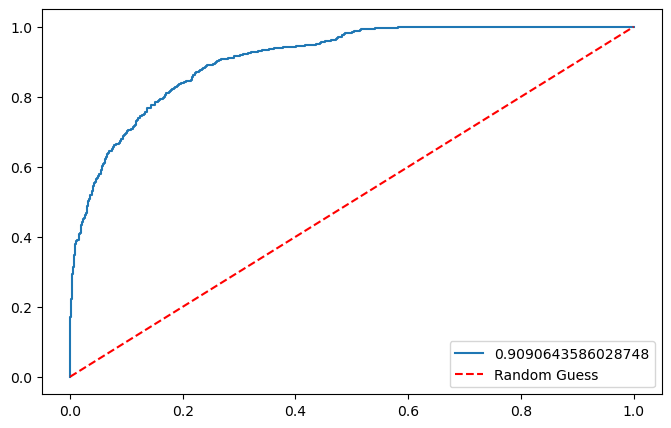

In [150]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label = auc_score)
plt.plot([0,1],[0,1],color='red', linestyle='--', label='Random Guess')
plt.legend(loc='lower right')
plt.show()

In [153]:
# lets try XGBT
import xgboost as xgb
xgb= xgb.XGBClassifier()
param_grid= {
    'objective':'binary:logistic',
    'eta':[0.1,0.15,0.2,0.3],
    'max_depth':[2,3,4],
    'subsample':[0.7,0.8,0.9],
    
    
}
grid = GridSearchCV()


In [ ]:
verbosity=1, 